<a href="https://colab.research.google.com/github/philnumpy/PRML-PROJECT/blob/main/dbscanprml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DB SCAN

In [16]:
import pandas as pd #panel data that helps manipulate data
import numpy as np
from sklearn.preprocessing import StandardScaler#to scale and normalise data

In [17]:
#loading the original dataset
original_data=pd.read_csv('/content/spotify_tracks.csv')

In [18]:
#getting data info to detect any null or duplicate values
original_data.info()
lang=['Hindi','English']
original_data=original_data[original_data['language'].isin(lang)]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  int64  
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  int64  
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  int64  
 16  speechiness       62317 non-null  float6

In [19]:
#dropping any duplicate values
original_data.drop_duplicates()

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
7,63tA4cYTJATGSqTE0O8Vp4,Knockout Song - Funk Mix,"Anirudh Ravichander, Madley Blues, Vignesh Shi...",2024,18,https://i.scdn.co/image/ab67616d0000b2732d6b57...,Knockout Song (Funk Mix),0.11900,0.801,87089,...,4,0.1320,-5.771,0,0.2590,119.971,4,0.821,https://open.spotify.com/track/63tA4cYTJATGSqT...,English
11,7qjOhCEl3pxRjJ2mHnfGrs,"Villain Kaun Hai (From ""Leo (Hindi)"")","Anirudh Ravichander, Manisha Eerabathini, Samp...",2024,34,https://i.scdn.co/image/ab67616d0000b273244603...,"Villain Kaun Hai [From ""Leo (Hindi)""]",0.28000,0.684,185802,...,7,0.0818,-8.282,0,0.0419,106.031,4,0.451,https://open.spotify.com/track/7qjOhCEl3pxRjJ2...,Hindi
15,0BBAcsIw7RYLtHFTNJUQFe,Knockout Song - Ambient Lofi,"Anirudh Ravichander, Madley Blues, Vignesh Shi...",2024,12,https://i.scdn.co/image/ab67616d0000b2738aa5c0...,Knockout Song (Ambient Lofi),0.45100,0.609,98400,...,4,0.1110,-9.933,0,0.0945,99.186,4,0.718,https://open.spotify.com/track/0BBAcsIw7RYLtHF...,English
141,0JCcLshapR8UnPz8PwNP6x,"Badass (From ""Leo (Hindi)"")","Anirudh Ravichander, Raqueeb Alam, Hanuman",2023,45,https://i.scdn.co/image/ab67616d0000b273054426...,"Badass [From ""Leo (Hindi)""]",0.02660,0.669,230741,...,3,0.3300,-3.364,0,0.1190,93.016,4,0.486,https://open.spotify.com/track/0JCcLshapR8UnPz...,Hindi
149,2QwpIhEJmkGMDxK3XpNRFA,Lokiverse 2.0,Anirudh Ravichander,2023,27,https://i.scdn.co/image/ab67616d0000b273f954ce...,Leo (Hindi) [Original Motion Picture Soundtrack],0.00069,0.641,114194,...,1,0.0767,-6.228,1,0.0456,93.006,4,0.376,https://open.spotify.com/track/2QwpIhEJmkGMDxK...,Hindi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61670,494um3oFZmnz1NKDpg7bBa,Chapter 175 - Cottage by the Sea - A BRAND NEW...,"Keri Beevis, Shakira Shute",2024,0,https://i.scdn.co/image/ab67616d0000b27313746b...,Cottage by the Sea [A BRAND NEW pulse-pounding...,0.49200,0.713,181429,...,6,0.2970,-17.738,0,0.9380,87.090,3,0.294,https://open.spotify.com/track/494um3oFZmnz1NK...,English
61671,47GnjbcUMj4STqqOXfh3NI,Chapter 181 - Cottage by the Sea - A BRAND NEW...,"Keri Beevis, Shakira Shute",2024,0,https://i.scdn.co/image/ab67616d0000b27313746b...,Cottage by the Sea [A BRAND NEW pulse-pounding...,0.63200,0.637,183659,...,7,0.2060,-19.261,1,0.9360,83.769,4,0.322,https://open.spotify.com/track/47GnjbcUMj4STqq...,English
61672,6KYcLEfAipo7beIaT3oxa9,Chapter 67 - Nowhere to Hide,"Keri Beevis, Shakira Shute",2024,0,https://i.scdn.co/image/ab67616d0000b273bf257e...,Nowhere to Hide (Unabridged),0.61800,0.720,182915,...,1,0.3490,-21.362,1,0.9060,117.730,5,0.472,https://open.spotify.com/track/6KYcLEfAipo7beI...,English
61673,0T3bM5ImA8od63PlKnHNg7,Just a Crush Thing,Shakira Jasmine,2024,0,https://i.scdn.co/image/ab67616d0000b273d536fc...,Songs For My Valentine,0.64000,0.513,187580,...,4,0.5640,-6.192,1,0.0338,155.077,4,0.320,https://open.spotify.com/track/0T3bM5ImA8od63P...,English


In [20]:
for col in original_data.columns:
  original_data.dropna(inplace=True)

In [21]:
df.isnull().sum()

,0
track_id,0
track_name,0
artist_name,0
year,0
popularity,0
artwork_url,0
album_name,0
acousticness,0
danceability,0
duration_ms,0


In [22]:
original_data.shape

(29132, 22)

In [23]:
#creating a seperate file that store names of all songs
song_name=original_data['track_name']

In [24]:
#function to get data of songs belonging to a particular language
def get_language_song(data,language):
  language_songs=original_data[original_data['language'].str.contains(language, case=False)]
  return pd.DataFrame(language_songs)

In [25]:
hindi_data = get_language_song(original_data, "Hindi")

In [26]:
# Extract and scale audio features
dataframe_features = hindi_data.iloc[:, 4:20]
dataframe_features.drop(["artwork_url", "album_name"], axis=1, inplace=True)

In [27]:
dataframe_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5740 entries, 11 to 56195
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        5740 non-null   int64  
 1   acousticness      5740 non-null   float64
 2   danceability      5740 non-null   float64
 3   duration_ms       5740 non-null   int64  
 4   energy            5740 non-null   float64
 5   instrumentalness  5740 non-null   float64
 6   key               5740 non-null   int64  
 7   liveness          5740 non-null   float64
 8   loudness          5740 non-null   float64
 9   mode              5740 non-null   int64  
 10  speechiness       5740 non-null   float64
 11  tempo             5740 non-null   float64
 12  time_signature    5740 non-null   int64  
 13  valence           5740 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 672.7 KB


In [28]:
sc=StandardScaler()
dataframe=sc.fit_transform(dataframe_features)  #to centre and scale the data preparing it for PCA s.t. mean is zero and standard deviation is 1

Enter a Hindi song name: Soch Na Sake (From "Airlift")

Recommended Hindi Songs:
                                             track_name  \
0                 Villain Kaun Hai (From "Leo (Hindi)")   
1                           Badass (From "Leo (Hindi)")   
2                                         Lokiverse 2.0   
3                Tera Hi Jaadu Hai (From "Leo (Hindi)")   
4                                          Bloody Sweet   
...                                                 ...   
3682                                               Shor   
3683                      Jeene De - Amanat Ali Version   
3684                                    Rab Sab Se Sona   
3685  Saibo (From "Shor in the City") - The DJ Suket...   
3686                                         Percentage   

                                            artist_name  
0     Anirudh Ravichander, Manisha Eerabathini, Samp...  
1            Anirudh Ravichander, Raqueeb Alam, Hanuman  
2                                   

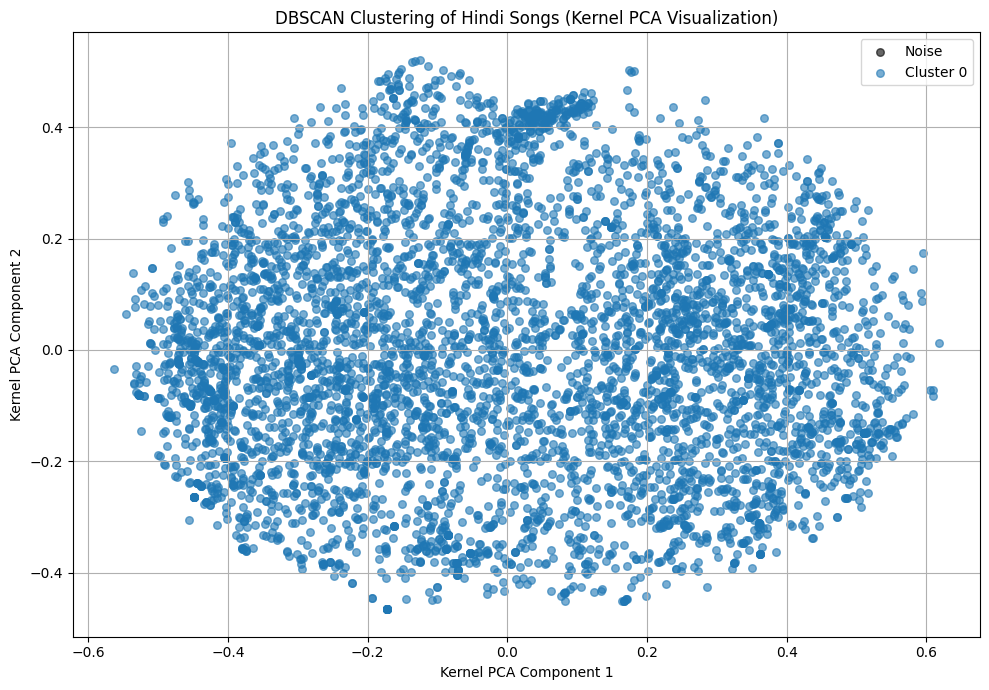

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial import KDTree

X = dataframe  # already preprocessed features
df = hindi_data.copy()  # original Hindi song dataset

# --- DBSCAN from scratch ---
class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = np.full(len(X), -1)

    def fit(self, X):
        tree = KDTree(X)
        cluster_id = 0
        for i in range(len(X)):
            if self.labels[i] != -1:
                continue
            neighbors = tree.query_ball_point(X[i], r=self.eps)#This gets all points within ε (epsilon) distance from point i
            if len(neighbors) < self.min_samples:
                self.labels[i] = -2  # mark as noise
                continue
            self._expand_cluster(tree, i, neighbors, cluster_id)
            cluster_id += 1

    def _expand_cluster(self, tree, i, neighbors, cluster_id):
        queue = set(neighbors)
        self.labels[i] = cluster_id
        while queue:
            point = queue.pop()
            if self.labels[point] == -2:
                self.labels[point] = cluster_id
            if self.labels[point] != -1:
                continue
            self.labels[point] = cluster_id
            new_neighbors = tree.query_ball_point(X[point], r=self.eps)
            if len(new_neighbors) >= self.min_samples:
                queue.update(set(new_neighbors))

# --- Apply DBSCAN ---
eps = 12.409
min_samples = 7
dbscan = DBSCAN(eps, min_samples)
dbscan.fit(X)

df["cluster"] = dbscan.labels

# --- Recommendation Function ---
def recommend_songs(input_song):
    song_row = df[df["track_name"].str.lower() == input_song.lower()]
    if song_row.empty:
        print("Song not found.")
        return

    song_cluster = song_row["cluster"].values[0]
    if song_cluster == -2:
        print("Song is marked as noise, no recommendations.")
        return

    # Get all songs in the same cluster
    cluster_songs = df[df["cluster"] == song_cluster].copy()

    # Normalize song names to lower case for comparison
    input_song_lower = input_song.strip().lower()
    cluster_songs["track_name_lower"] = cluster_songs["track_name"].str.strip().str.lower()

    # Remove input song and its variants from recommendations
    filtered_songs = cluster_songs[cluster_songs["track_name_lower"] != input_song_lower]

    # Drop duplicates based on normalized song name
    filtered_songs = filtered_songs.drop_duplicates(subset="track_name_lower")

    if filtered_songs.empty:
        print("No other songs in the same cluster to recommend.")
        return

    print("\nRecommended Hindi Songs:")
    print(filtered_songs[["track_name", "artist_name"]].reset_index(drop=True))

# --- Run the system ---
input_song = input("Enter a Hindi song name: ")
recommend_songs(input_song)

# --- Summary ---
unique_clusters = set(dbscan.labels)
num_clusters = len([label for label in unique_clusters if label >= 0])
num_noise = np.sum(dbscan.labels == -2)

print(f"\nNumber of Hindi song clusters (excluding noise): {num_clusters}")
print(f"Number of Hindi songs marked as noise: {num_noise}")

from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D using Kernel PCA (RBF kernel is commonly used)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.05)  # You can tune gamma
X_kpca = kpca.fit_transform(X)

# Add Kernel PCA result to DataFrame
df["kpca1"] = X_kpca[:, 0]
df["kpca2"] = X_kpca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 7))
unique_labels = np.unique(dbscan.labels)

for label in unique_labels:
    cluster_data = df[df["cluster"] == label]
    if label == -2:
        color = "black"
        label_text = "Noise"
    else:
        color = plt.cm.tab20(label % 20)  # Cycle through tab20 colors
        label_text = f"Cluster {label}"
    plt.scatter(cluster_data["kpca1"], cluster_data["kpca2"],
                label=label_text, alpha=0.6, s=30, c=[color])

plt.title("DBSCAN Clustering of Hindi Songs (Kernel PCA Visualization)")
plt.xlabel("Kernel PCA Component 1")
plt.ylabel("Kernel PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



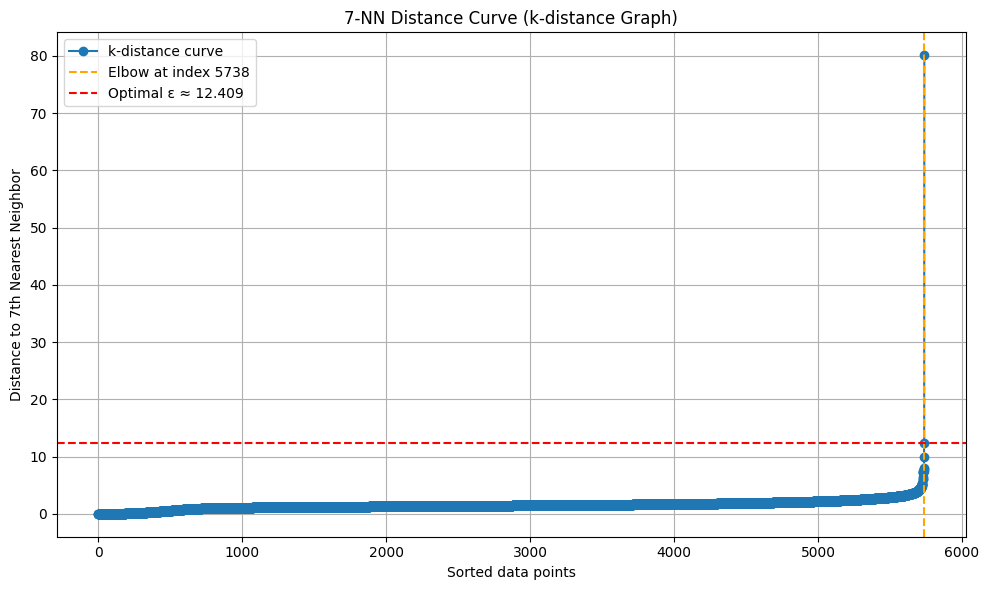

Estimated optimal epsilon (ε): 12.4094
Optimal ε (ε) value: 12.409437726780535


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Assuming 'X' is your scaled data matrix (e.g., after StandardScaler or similar)
X = dataframe

def find_optimal_epsilon(X, min_samples=5, show_plot=True):
    """
    Finds the optimal epsilon (ε) value for DBSCAN using the k-distance graph method.

    Parameters:
    - X: Feature matrix (scaled).
    - min_samples: Number of minimum points to form a dense region.
    - show_plot: Whether to show the elbow graph.

    Returns:
    - optimal_eps: Estimated epsilon value using elbow method.
    """
    # Fit nearest neighbors
    neigh = NearestNeighbors(n_neighbors=min_samples)
    neigh.fit(X)

    # Compute k-distances (distance to the kth nearest neighbor)
    distances, _ = neigh.kneighbors(X)
    k_distances = np.sort(distances[:, -1])  # sort by the farthest of k-neighbors

    # Compute difference and find "elbow" point
    diff = np.diff(k_distances)
    elbow_index = np.argmax(diff)
    optimal_eps = k_distances[elbow_index]

    if show_plot:
        plt.figure(figsize=(10, 6))
        plt.plot(k_distances, marker='o', label="k-distance curve")
        plt.axvline(elbow_index, linestyle='--', color='orange', label=f"Elbow at index {elbow_index}")
        plt.axhline(optimal_eps, linestyle='--', color='red', label=f"Optimal ε ≈ {optimal_eps:.3f}")
        plt.title(f"{min_samples}-NN Distance Curve (k-distance Graph)")
        plt.xlabel("Sorted data points")
        plt.ylabel(f"Distance to {min_samples}th Nearest Neighbor")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    print(f"Estimated optimal epsilon (ε): {optimal_eps:.4f}")
    return optimal_eps

# Example usage:
optimal_eps = find_optimal_epsilon(X, min_samples=7)
print(f"Optimal ε (ε) value: {optimal_eps}")
